In [1]:
import numpy as np
from numpy import random as rd
import time
from solvers_listos import *
from funciones import *

In [2]:
# # objective function
# def objective(v):
# 	x, y = v
# 	return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20

# # check if a point is within the bounds of the search
# def in_bounds(point, bounds):
# 	# enumerate all dimensions of the point
# 	for d in range(len(bounds)):
# 		# check if out of bounds for this dimension
# 		if point[d] < bounds[d, 0] or point[d] > bounds[d, 1]:
# 			return False
# 	return True

# # hill climbing local search algorithm
# def hillclimbing(objective, bounds, n_iterations, step_size, start_pt):
# 	# store the initial point
# 	solution = start_pt
# 	# evaluate the initial point
# 	solution_eval = objective(solution)
# 	# run the hill climb
# 	for i in range(n_iterations):
# 		# take a step
# 		candidate = None
# 		while candidate is None or not in_bounds(candidate, bounds):
# 			candidate = solution + randn(len(bounds)) * step_size
# 		# evaluate candidate point
# 		candidte_eval = objective(candidate)
# 		# check if we should keep the new point
# 		if candidte_eval <= solution_eval:
# 			# store the new point
# 			solution, solution_eval = candidate, candidte_eval
# 	return [solution, solution_eval]

# # iterated local search algorithm
# def iterated_local_search(objective, bounds, n_iter, step_size, n_restarts, p_size):
# 	# define starting point
# 	best = None
# 	while best is None or not in_bounds(best, bounds):
# 		best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
# 	# evaluate current best point
# 	best_eval = objective(best)
# 	# enumerate restarts
# 	for n in range(n_restarts):
# 		# generate an initial point as a perturbed version of the last best
# 		start_pt = None
# 		while start_pt is None or not in_bounds(start_pt, bounds):
# 			start_pt = best + randn(len(bounds)) * p_size
# 		# perform a stochastic hill climbing search
# 		solution, solution_eval = hillclimbing(objective, bounds, n_iter, step_size, start_pt)
# 		# check for new best
# 		if solution_eval < best_eval:
# 			best, best_eval = solution, solution_eval
# 			print('Restart %d, best: f(%s) = %.5f' % (n, best, best_eval))
# 	return [best, best_eval]

# # seed the pseudorandom number generator
# seed(1)
# # define range for input
# bounds = asarray([[-5.0, 5.0], [-5.0, 5.0]])
# # define the total iterations
# n_iter = 1000
# # define the maximum step size
# s_size = 0.05
# # total number of random restarts
# n_restarts = 30
# # perturbation step size
# p_size = 1.0
# # perform the hill climbing search
# best, score = iterated_local_search(objective, bounds, n_iter, s_size, n_restarts, p_size)
# print('Done!')
# print('f(%s) = %f' % (best, score))


In [3]:
# def random_removal(state, random_state):
#     destroyed = state.copy()

#     for node in random_state.choice(
#         range(1, len(G.nodes)), nodes_to_destroy, replace=False
#     ):
#         node = f"N_{node}"
#         if node == "N_0":
#             print("No se puede eliminar el depósito")
#         destroyed.unnasigned.append(node)
#         route = destroyed.find_route(node)
#         if route is not None:
#             route.remove(node)
    
#     non_empty_routes = [ruta for ruta in destroyed.routes if len(ruta) > 0]

#     destroyed.routes = non_empty_routes
#     return destroyed

# def greedy_repair(state, random_state):
#     repaired = state.copy()

#     random_state.shuffle(repaired.unnasigned)

#     while len(repaired.unnasigned) > 0:
#         node = repaired.unnasigned.pop()
#         route, idx = best_insert(node, repaired)
#         if route is not None:
#             route.insert(idx, node)
#         else:
#             repaired.routes.append([node])
#     return repaired

# def best_insert(node, state):
#     best_cost, best_route, best_idx = float("inf"), None, None
#     for route in state.routes:
#         for i in range(1, len(route) + 1):
#             if can_insert(node, route):
#                 cost = insertion_cost(node, route, i)

#                 if cost < best_cost:
#                     best_cost = cost
#                     best_route = route
#                     best_idx = i

#     return best_route, best_idx

# def can_insert(node, route, demanda, cap = 871):
#     total = sum([demanda[int(nodo[2:])] for nodo in route])
#     return total + demanda[int(node[2:])] <= cap   ####OJO ACÁ CON EL CAP, SI QUIERO CAMBIAR LA CAPACIDAD DEL VEHÍCULO TENGO QUE MODIFICARLO ACÁ

# def insertion_cost(node, route, idx):
#     pred = "N_0" if idx == 0 else route[idx - 1]
#     succ = "N_0" if idx == len(route) else route[idx]
#     dist = distancias[pred][node] + distancias[node][succ] - distancias[pred][succ]
#     return dist

# def hillclimbing(objective, bounds, n_iterations, step_size, start_pt):
# 	# store the initial point
# 	solution = start_pt
# 	# evaluate the initial point
# 	solution_eval = objective(solution)
# 	# run the hill climb
# 	for i in range(n_iterations):
# 		# take a step
# 		candidate = None
# 		while candidate is None or not in_bounds(candidate, bounds):
# 			candidate = solution + randn(len(bounds)) * step_size
# 		# evaluate candidate point
# 		candidte_eval = objective(candidate)
# 		# check if we should keep the new point
# 		if candidte_eval <= solution_eval:
# 			# store the new point
# 			solution, solution_eval = candidate, candidte_eval
# 	return [solution, solution_eval]

In [4]:
def eliminar_duplicados(ruta):
    unique_nodes = []
    [unique_nodes.append(node) for node in ruta if node not in unique_nodes]
    return unique_nodes

def random_reverse(rutas, nodos = [] ,iters = 1):
    for _ in range(iters):
        id = rd.choice(len(rutas))
        ruta = rutas[id]
        if len(ruta) > 2:
            i, j = rd.choice(range(1, len(ruta)), 2, replace=False)
            ruta[i], ruta[j] = ruta[j], ruta[i]
            # print(f'{id}: {ruta}')
        rutas[id] = ruta
    return rutas

def random_swap(rutas, nodos = [], iters=1):
    for _ in range(iters):
        id1,id2 = rd.choice(len(rutas), 2, replace = False)
        ruta1, ruta2 = rutas[id1], rutas[id2]
        # print(f'{id1}: {ruta1} | {id2}: {ruta2}')
        if len(ruta1) > 3 and len(ruta2)>3:
            bloque1 = rd.choice(range(1, len(ruta1)-1))  
            par1 = (ruta1[bloque1], ruta1[bloque1 + 1])
            bloque2 = rd.choice(range(1, len(ruta2)-1))
            par2 = (ruta2[bloque2], ruta2[bloque2 + 1])
            # print(f'R{id1}-Bloque1: {par1} x R{id2}-Bloque2: {par2}')
            ruta1[bloque1], ruta1[bloque1+1] = par2[0], par2[1] 
            ruta2[bloque2], ruta2[bloque2+1] = par1[0], par1[1]
            ruta1, ruta2 = eliminar_duplicados(ruta1), eliminar_duplicados(ruta2)
        rutas[id1] = ruta1
        rutas[id2] = ruta2
    return rutas

def random_move(rutas, nodos = [], iters = 1):
    for _ in range(iters):
        id = rd.choice(len(rutas))
        ruta = rutas[id]
        if len(ruta) > 3:
            i, j = rd.choice(range(1, len(ruta)), 2, replace=False)
            node = ruta.pop(i)
            # print(f'Muevo el nodo {node} de la ruta {id} de la posición {i} a la posición {j}')
            ruta.insert(j, node)
        rutas[id] = ruta
    return rutas

def random_insert(rutas, nodos, iters = 1):
    for _ in range(iters):
        id = rd.choice(len(rutas))
        ruta = rutas[id]
        nodo = rd.choice(nodos)
        if ruta != [] and len(ruta)>2:
            pos = rd.choice(range(1, len(ruta)))
            # print(f'Inserto el nodo {nodo} en la ruta {id} en la posición {pos}')
            ruta.insert(pos, nodo)
            ruta = eliminar_duplicados(ruta)
            rutas[id] = ruta
    return rutas

def random_remove(rutas, nodos = [], iters = 1):
    for _ in range(iters):
        id = rd.choice(len(rutas))
        ruta = rutas[id]
        if ruta != [] and len(ruta) > 1:
            pos = rd.choice(range(1, len(ruta)))
            # print(f'Elimino el nodo {ruta[pos]} de la ruta {id} en la posición {pos}')
            ruta.pop(pos)
            rutas[id] = ruta
    return rutas

def operacion_random(rutas, nodos):
    ops = [random_insert, random_remove, random_move, random_swap, random_reverse]
    op = rd.choice(ops)
    # print(f'Operación: {op.__name__}')
    return op(rutas,nodos)    

def costo_total(rutas, distancias):
    costo = 0
    for ruta in rutas.values():
        if ruta != []:
            for i in range(len(ruta) - 1):
                costo += distancias[ruta[i]][ruta[i + 1]]
        else:
            costo += 0
    return costo

def Local_Search(G, ruta_0, demandas, distancias, cap, F, n_restarts = 10, n_iters = 5):
    
    # time_limit = 10
    # t0 = time.time()
    best = ruta_0.copy()
    # print(best)
    best_eval = costo_total(best, distancias)
    nodos = G.nodes()

    # while time.time() - t0 < time_limit:
    for t in range(n_restarts):
        new = best.copy()
        for k in range(n_iters):
            new = operacion_random(new, nodos)

        new_eval = costo_total(new, distancias)
        if new_eval < best_eval:
            best, best_eval = new, new_eval
            # print(f'Restart {t}, best: {best_eval}')
    # print(f'Best: {best}')
    return best, best_eval


# nodos = [1,2,3,4,5,6,7,8,9,10]
# rutas = [[], [0,2,6,1,7,5], [0,4,1,7,5,3,9], [0,1,6,9,3,10,5]]
# operacion_random(rutas, nodos)


[[], [0, 2, 6, 1, 7, 5], [0, 4, 1, 7, 5, 3, 9], [0, 1, 6, 9, 3, 10, 5]]

In [5]:
def costo_total(rutas, distancias):
    costo = 0
    for ruta in rutas.values():
        if ruta != []:
            for i in range(len(ruta) - 1):
                costo += distancias[ruta[i]][ruta[i + 1]]
        else:
            costo += 0
    return costo

In [6]:
def Local_Search(G, ruta_0, demandas, distancias, cap, F, n_restarts = 10, n_iters = 5):
    
    # time_limit = 10
    # t0 = time.time()
    best = ruta_0.copy()
    # print(best)
    best_eval = costo_total(best, distancias)
    nodos = G.nodes()

    # while time.time() - t0 < time_limit:
    for t in range(n_restarts):
        new = best.copy()
        for k in range(n_iters):
            new = operacion_random(new, nodos)

        new_eval = costo_total(new, distancias)
        if new_eval < best_eval:
            best, best_eval = new, new_eval
            # print(f'Restart {t}, best: {best_eval}')
    # print(f'Best: {best}')
    return best, best_eval


In [7]:
def realizacion_demanda_LS(G, demandas, ruido = 0.05):
    """
    Función que simula la demanda de los locales para un determinado periodo.
    """
    grafo = G.copy()
    insatisfecho = 0
    for nodo in grafo.nodes(data=True):
        if nodo[0] != 'N_0':
            dem = demandas[int(nodo[0][2:])]
            if dem <= grafo.nodes[nodo[0]]['Inv']:
                grafo.nodes[nodo[0]]['Inv'] -= dem

            else:
                grafo.nodes[nodo[0]]['Inv'] = 0
                insatisfecho += dem - grafo.nodes[nodo[0]]['Inv']
    # print(dems)
    # for nodo in grafo.nodes(data=True):
        # print(nodo[0],nodo[1]['Inv'])

    return grafo, insatisfecho

def adaptar_pron(prono, F):
    dict_pro = {}
    for t in range(F):
        dict_pro[t] = {nodo: prono[nodo]  for nodo in prono.keys()}
    return dict_pro

def reaccion_inventario(graf, mu, sd, alfa = 0.05):
    """
    Función que verifica que locales deben ser visitados en base a su inventario actual. 
    En caso de que el inventario se encuentre bajo el umbral de tolerancia, se retorna True.
    """
    grafo = graf.copy()
    visitas = {nodo : False for nodo in G.nodes()}
    for nodo in grafo.nodes(data=True):
        id_nodo = int(nodo[0][2:])-1
        media = mu[id_nodo]
        desviacion = sd[id_nodo]
        s = media + norm.ppf((1 - alfa)/2)* desviacion  #Stock de seguridad
        # print(f'{nodo[1]["Inv"]}, s{int(nodo[0][2:])} = {s}, {nodo[1]["Inv"] <= s}')
        if nodo[1]["Inv"] <= s:
            visitas[nodo[0]] = True
            # print(f'Visitar {nodo[0]}')
    # print(visitas)
    return visitas

def ejecutar_ruta(G,ruta,matriz_dst):
    """
    Función que simula la ejecución de una ruta.
    """
    g = G.copy()
    ruta = ruta.copy()
    ruta.pop(0)
    ruta.pop(-1)
    ruta = [int(nodo[2:]) for nodo in ruta]
    # distancia = calcular_largo_ruta(ruta, matriz_dst)
    stock = 0
    for nodo in ruta:
        stock += g.nodes[f'N_{nodo}']['Up'] - G.nodes[f'N_{nodo}']['Inv']
        g.nodes[f'N_{nodo}']['Inv'] = G.nodes[f'N_{nodo}']['Up']
    g.nodes['N_0']['Inv'] -= stock
    return g, stock



In [8]:
def ruteo_LS(H, distancias, pron_demandas, cap, F, mu, sd):
    grafo = H.copy()

    rutas = {}
    for t in range(F):
        '''
        Resolver el problema de ruteo para el periodo t
        Demanda = pronostico_demandas[t]
        '''
        demandas_t = pron_demandas[t]
        visitas_NN = reaccion_inventario(grafo, mu, sd)
        # print(visitas_NN)
        if sum(visitas_NN.values()) == 0:
            # print("No hay locales que visitar")
            rutas[t] = []

        else:    
            ruta_R = nearest_neighbor(grafo, distancias, disponibilidad=visitas_NN)[-1] #devuelve la ruta a realizar
            rutas[t] = ruta_R
            # print(f"Ruta {t}: ", ruta_R )
            grafo, stock = ejecutar_ruta(grafo, ruta_R, distancias)   
        grafo, insatisfecho = realizacion_demanda_LS(grafo, demandas_t)

    rutas, costo = Local_Search(grafo, rutas, demandas_t, distancias, cap, F)

    ruta_LS = eliminar_duplicados(rutas[0])

    return ruta_LS

In [10]:
def simular_ejecucion_P_LS(grafo_inicial, cap, dem_historico, T=1, F=1):
    # Inicializar variables     
    # ---------------------
    G0 = grafo_inicial.copy()
    distancias = calcular_matriz_dist(G0)
    ubicaciones = list(G0.nodes()) # Lista de ubicaciones
    inventarios = [G0.nodes(data=True)[i]['Inv'] for i in ubicaciones] # Lista de inventarios
    h = [G0.nodes(data=True)[i]['h'] for i in ubicaciones] # Lista de costos de inventario
    # dem_historico = simular_demanda_previa(G0, dist = 'n', T=1000) 
    d_total = 0
    rutas = {t : None for t in range(T)} # Lista de rutas
    inventario_total = []
    perdidas = []

    # print("Inventario inicial: ")
    # for nodo in G0.nodes(data=True):
    #         print(nodo[0],nodo[1]['Inv'])
    # print("\n")

    for t in range(T):
        # print('\n')
        mu_demanda = [np.mean(dem_historico[nodo]) for nodo in dem_historico.keys()]    
        sd_demanda = [np.std(dem_historico[nodo]) for nodo in dem_historico.keys()]
        pronostico = {int(nodo[2:]): pronostico_SEDA(
                                    dem_historico[nodo], T = F, pron = True, alpha=0.2, beta=0.1, theta=0.5)[0]
                                    for nodo in dem_historico.keys()}
        # print(pronostico)
        pronostico = adaptar_pron(pronostico, F)

        ruta_P = ruteo_LS(H = G0, distancias = distancias, pron_demandas = pronostico,
                           cap = cap, F = F, mu = mu_demanda, sd =sd_demanda)
        

        if ruta_P != [] and ruta_P != None and ruta_P != ['N_0']:
             ruta_P += ['N_0']
             G0, stock = ejecutar_ruta(G0, ruta_P, distancias)
        
        elif ruta_P == ['N_0']:
            ruta_P = []

        rutas[t] = ruta_P
        # print(f"Ruta {t}: ", ruta_P)
        # visitas_proactiva = proactiva_inventario(G0, tolerancia = 0.2, dist = 'n', mu = 0, sigma = 0.1, M = 1000)

        
        G0, demanda, insatisfecho = realizacion_demanda(G0)
        d_total += demanda
        inventarios = [G0.nodes(data=True)[i]['Inv'] for i in ubicaciones if i != 'N_0']
        inventario_total.append(sum(inventarios))
        perdidas.append(insatisfecho)

        #Actualizo demandas
        for nodo in ubicaciones:
            if nodo != 'N_0':
                dem_historico[nodo].append(demanda[nodo])


    # print('\n')
    # print("Inventario final: ")
    # for nodo in G0.nodes(data=True):
    #     print(nodo[0],nodo[1]['Inv'])
    print(f'F = {F}, Demanda perdida total: {sum(perdidas)} | Demanda perdida promedio: {sum(perdidas)/T}')        

    # graficar_rutas(rutas, G0)
    return rutas, perdidas, inventario_total

# rutas, perdidas, inventarios = simular_ejecucion_P_LS(grafo_inicial = G, T = 365, F = 10, cap = 871)

Instancias y análisis

In [12]:
# G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= 'IRP1.xlsx' ,plot=False)
G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= 'n30empty.xlsx' ,plot=False)
historia = simular_demanda_previa(G, dist = 'n', T=1000) 

F = 2, Demanda perdida total: 22836.709332118226 | Demanda perdida promedio: 380.6118222019704
F = 2, Demanda perdida total: 23993.3592550576 | Demanda perdida promedio: 399.88932091762666
F = 2, Demanda perdida total: 21254.198939937814 | Demanda perdida promedio: 354.2366489989636
F = 2, Demanda perdida total: 21923.545540630017 | Demanda perdida promedio: 365.39242567716695
F = 2, Demanda perdida total: 23250.11980533159 | Demanda perdida promedio: 387.5019967555265
F = 2, Demanda perdida total: 23770.165206949336 | Demanda perdida promedio: 396.1694201158223
F = 2, Demanda perdida total: 22732.095123666437 | Demanda perdida promedio: 378.8682520611073
F = 2, Demanda perdida total: 22511.996378923144 | Demanda perdida promedio: 375.19993964871907
F = 2, Demanda perdida total: 20904.232370005793 | Demanda perdida promedio: 348.4038728334299
F = 2, Demanda perdida total: 21923.74424458993 | Demanda perdida promedio: 365.3957374098321
F = 5, Demanda perdida total: 19273.400173876853 | 

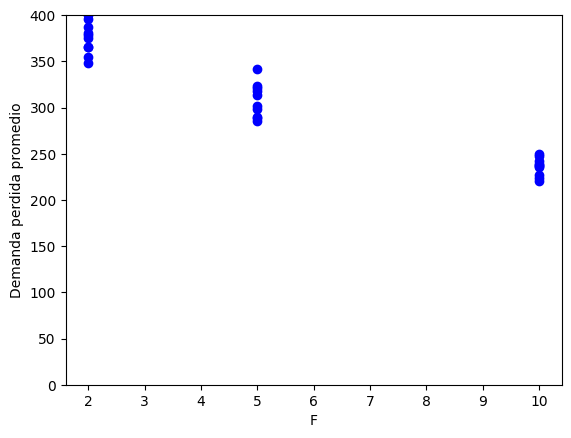

In [13]:
for f in [2,5,10]:
    for k in range(10):
        rutas, perdidas, inventarios = simular_ejecucion_P_LS(grafo_inicial = G, dem_historico= historia, T = 60, F = f, cap = 871)
        plt.scatter(f, np.mean(perdidas), label = f'F = {f}', color='blue')
# plt.legend()
plt.xlabel('F')
plt.ylabel('Demanda perdida promedio')
plt.ylim(0,400)
plt.show()

In [14]:
mis_rutas, perdidas, inventarios = simular_ejecucion_P_LS(grafo_inicial = G, T = 365, dem_historico=historia, F = 10, cap = 871)

F = 10, Demanda perdida total: 83066.61030616678 | Demanda perdida promedio: 227.57975426347065


In [15]:
mis_rutas
mis_rutas_t = {t : str(mis_rutas[t]) for t in mis_rutas.keys()}
# mis_rutas_t = {t : str(set(mis_rutas[t])) for t in mis_rutas.keys()}
df_rutas = pd.DataFrame.from_dict(mis_rutas_t, orient='index', columns=['Ruta'])
df_rutas.value_counts()

Ruta                                                                                                                                                            
['N_0', 'N_1', 'N_10', 'N_24', 'N_6', 'N_15', 'N_30', 'N_12', 'N_27', 'N_8', 'N_25', 'N_13', 'N_29', 'N_21', 'N_7', 'N_0']                                          1
['N_0', 'N_24', 'N_3', 'N_11', 'N_20', 'N_27', 'N_5', 'N_2', 'N_29', 'N_4', 'N_19', 'N_25', 'N_23', 'N_10', 'N_1', 'N_26', 'N_13', 'N_0']                           1
['N_0', 'N_24', 'N_3', 'N_11', 'N_1', 'N_6', 'N_19', 'N_12', 'N_27', 'N_28', 'N_16', 'N_2', 'N_21', 'N_26', 'N_23', 'N_0']                                          1
['N_0', 'N_24', 'N_28', 'N_30', 'N_17', 'N_7', 'N_12', 'N_8', 'N_18', 'N_2', 'N_9', 'N_5', 'N_19', 'N_25', 'N_16', 'N_23', 'N_10', 'N_26', 'N_0']                   1
['N_0', 'N_24', 'N_28', 'N_30', 'N_15', 'N_12', 'N_27', 'N_18', 'N_2', 'N_1', 'N_22', 'N_8', 'N_14', 'N_19', 'N_25', 'N_16', 'N_7', 'N_10', 'N_26', 'N_0']          1
         

In [16]:
def generar_df(rutas, N):

    rutas_bool = dict()
    for ruta, nodos in rutas.items():
        bools = dict()
        for i in range(1, N+1):
            if f'N_{i}' in nodos:
                bools[f'N_{i}'] = 1
            else:
                bools[f'N_{i}'] = 0
        rutas_bool[ruta] = bools
    
    df = pd.DataFrame.from_dict(rutas_bool, orient='index')
    
    df.rename(columns={'index': 'Ruta', 0: 'Nodo'}, inplace=True)
    df.rename_axis('Ruta', inplace=True)
    return df

N = len(G.nodes())-1
df = generar_df(mis_rutas, N)
df['sum'] = df.sum(axis=1)

In [17]:
df_nodos = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
df_nodos = df_nodos.iloc[1:]
df_nodos['frec'] = (df.describe()).T['mean']
dem_historico_media = {nodo: np.mean(historia[nodo]) for nodo in historia.keys()}
df_nodos['dem_mean'] = dem_historico_media.values()
df_nodos

,Inv,Up,Low,Prod,h,coord_x,coord_y,pos,frec,dem_mean
N_1,0,80,0,40,0.33,475,277,"(475, 277)",0.613699,40.035187
N_2,0,48,0,24,0.41,166,149,"(166, 149)",0.589041,23.977592
N_3,0,180,0,60,0.47,349,302,"(349, 302)",0.432877,60.091978
N_4,0,154,0,77,0.36,153,37,"(153, 37)",0.613699,76.971441
N_5,0,186,0,62,0.48,268,232,"(268, 232)",0.405479,61.975855
N_6,0,123,0,41,0.24,194,384,"(194, 384)",0.402740,41.042486
N_7,0,192,0,64,0.48,343,432,"(343, 432)",0.416438,63.949815
N_8,0,112,0,56,0.49,17,197,"(17, 197)",0.600000,55.965019
N_9,0,32,0,16,0.39,103,180,"(103, 180)",0.597260,16.007298
N_10,0,72,0,36,0.17,427,458,"(427, 458)",0.600000,35.896919


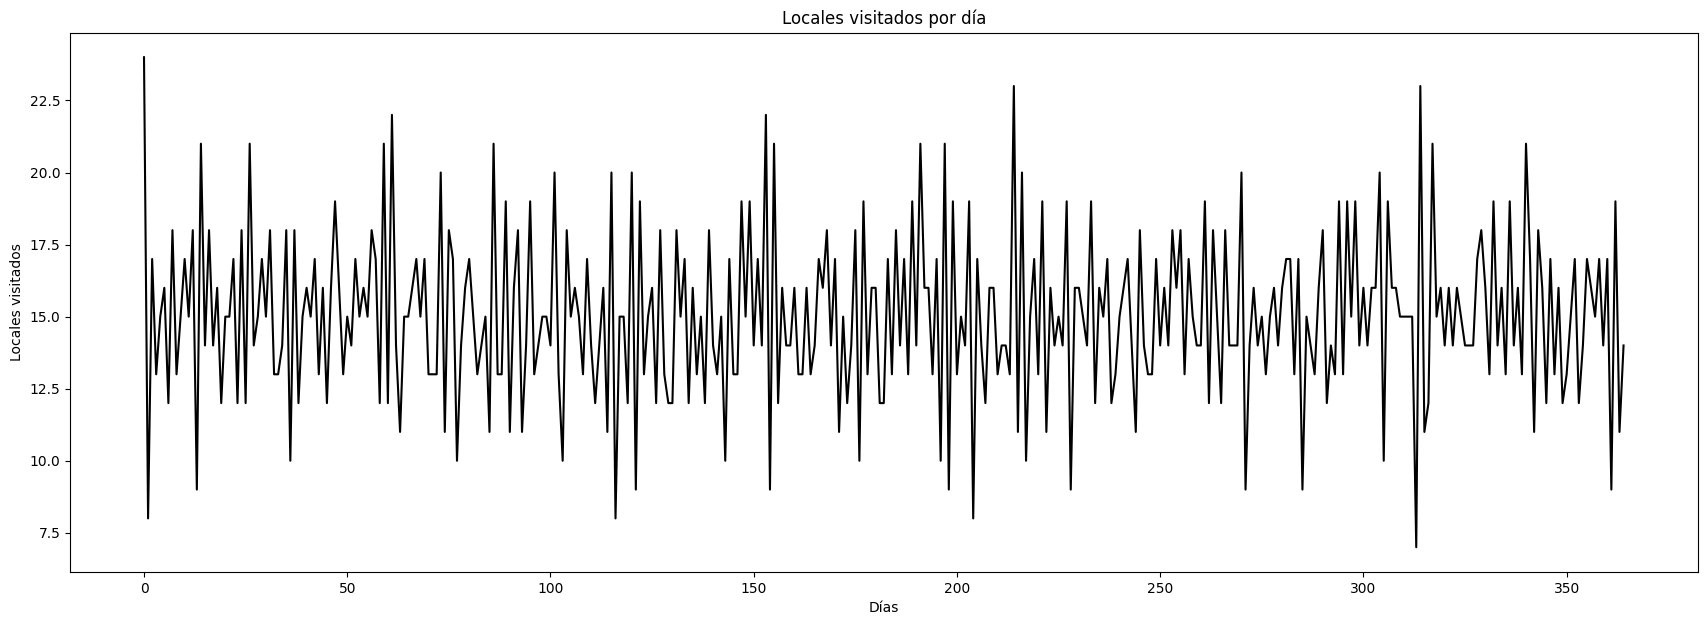

In [18]:
plt.figure(figsize=(21, 7))
plt.plot(df['sum'], '-', color='black')
plt.xlabel('Días')
plt.ylabel('Locales visitados')
plt.title('Locales visitados por día')
plt.show()

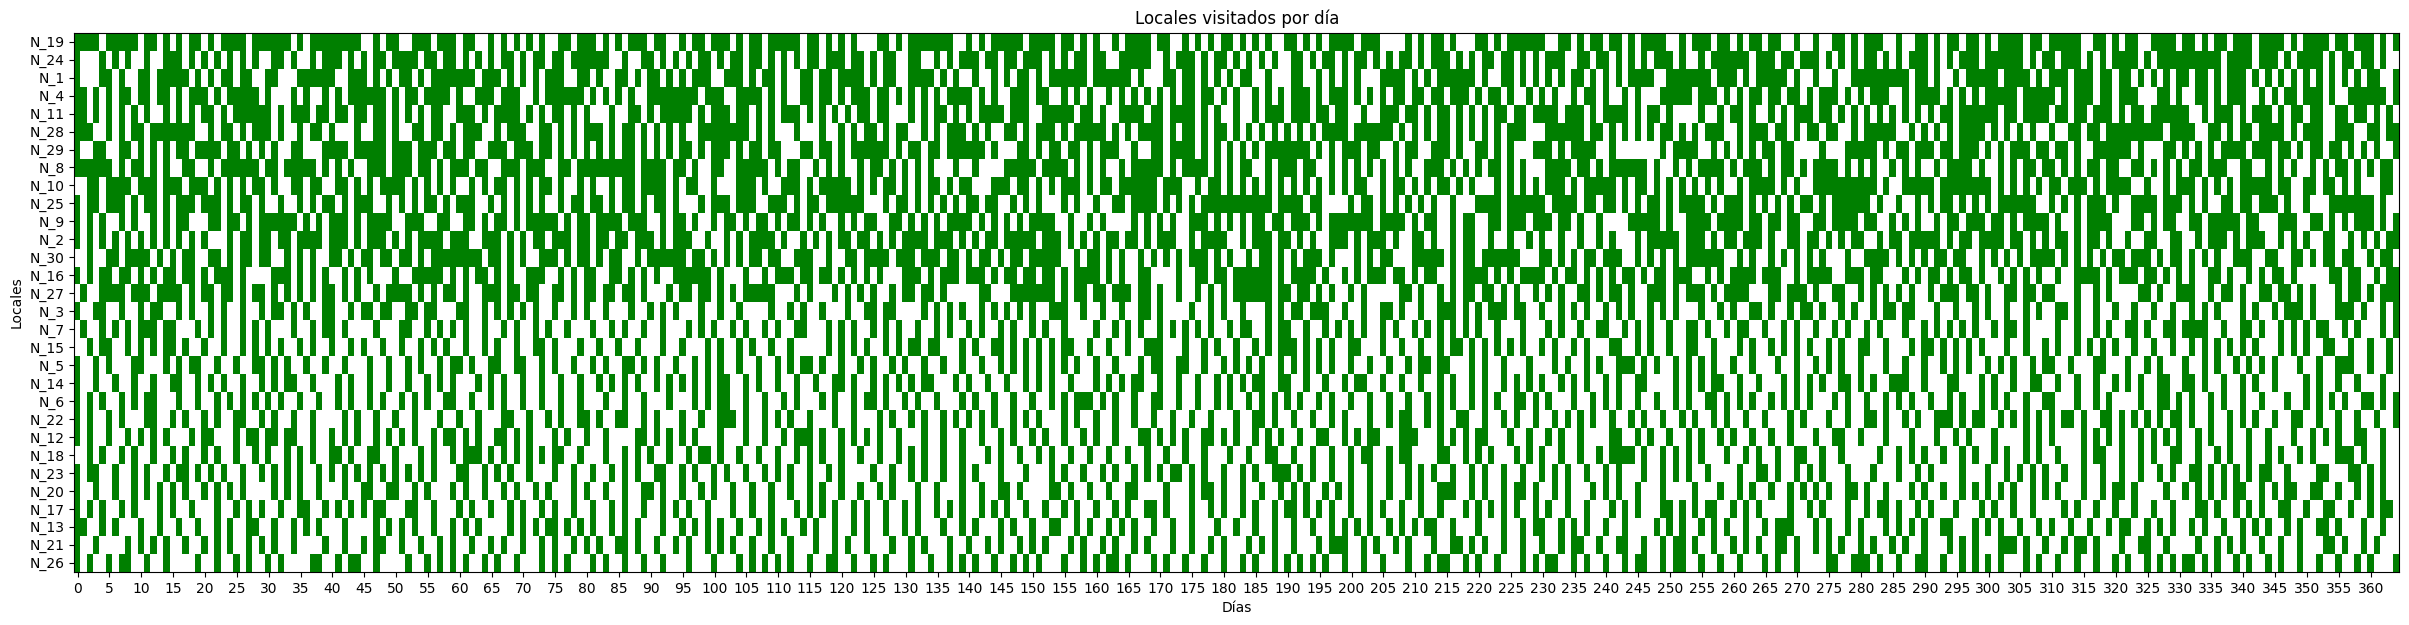

: 

In [23]:
plotear_tablero_visitas(df, guardar = True, nombre = 'plots//tablero_PRO_n30_orig.png')

In [20]:
cantidad_06 = len(df_nodos[df_nodos['frec'] >= 0.5])
cantidad_04 = len(df_nodos[df_nodos['frec'] < 0.5])

print (f'Locales visitados más de 50% de los días: {cantidad_06}, que corresponde a un {cantidad_06/N*100}%')
print (f'Locales visitados menos de 50% de los días: {cantidad_04}, que corresponde a un {cantidad_04/N*100}%')

Locales visitados más de 50% de los días: 15, que corresponde a un 50.0%
Locales visitados menos de 50% de los días: 15, que corresponde a un 50.0%


In [21]:
datos = dispersion_intervalos(df)
        

df_nodos['mean'] = datos['mean']
df_nodos['std'] = datos['std']
df_nodos['porcentaje demanda'] = df_nodos['dem_mean'] / df_nodos['Up']
df_nodos['porcentaje dem. inicial'] = df_nodos['Prod'] / df_nodos['Up']
df_nodos_corr = df_nodos[['Inv','Up','Low','Prod','h','frec','mean','std','dem_mean','porcentaje demanda','porcentaje dem. inicial']]
df_nodos

,Inv,Up,Low,Prod,h,coord_x,coord_y,pos,frec,dem_mean,mean,std,porcentaje demanda,porcentaje dem. inicial
N_1,0,80,0,40,0.33,475,277,"(475, 277)",0.613699,40.035187,1.625000,0.739510,0.500440,0.500000
N_2,0,48,0,24,0.41,166,149,"(166, 149)",0.589041,23.977592,1.693023,0.707894,0.499533,0.500000
N_3,0,180,0,60,0.47,349,302,"(349, 302)",0.432877,60.091978,2.303797,0.939357,0.333844,0.333333
N_4,0,154,0,77,0.36,153,37,"(153, 37)",0.613699,76.971441,1.625000,0.689526,0.499815,0.500000
N_5,0,186,0,62,0.48,268,232,"(268, 232)",0.405479,61.975855,2.452703,0.840965,0.333204,0.333333
N_6,0,123,0,41,0.24,194,384,"(194, 384)",0.402740,41.042486,2.476190,0.793968,0.333679,0.333333
N_7,0,192,0,64,0.48,343,432,"(343, 432)",0.416438,63.949815,2.394737,0.867224,0.333072,0.333333
N_8,0,112,0,56,0.49,17,197,"(17, 197)",0.600000,55.965019,1.657534,0.738118,0.499688,0.500000
N_9,0,32,0,16,0.39,103,180,"(103, 180)",0.597260,16.007298,1.669725,0.790483,0.500228,0.500000
N_10,0,72,0,36,0.17,427,458,"(427, 458)",0.600000,35.896919,1.657534,0.686847,0.498568,0.500000


In [22]:
df_nodos_corr.corr()

,Inv,Up,Low,Prod,h,frec,mean,std,dem_mean,porcentaje demanda,porcentaje dem. inicial
Inv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Up,NaN,1.000000,NaN,0.901948,-0.190532,-0.368311,0.367016,0.320511,0.902222,-0.397418,-0.399134
Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prod,NaN,0.901948,NaN,1.000000,-0.270619,0.022517,-0.022586,0.020851,0.999996,-0.006732,-0.008505
h,NaN,-0.190532,NaN,-0.270619,1.000000,-0.051843,0.038735,0.080235,-0.270057,-0.061572,-0.062492
frec,NaN,-0.368311,NaN,0.022517,-0.051843,1.000000,-0.998600,-0.775477,0.022219,0.987502,0.987148
mean,NaN,0.367016,NaN,-0.022586,0.038735,-0.998600,1.000000,0.760719,-0.022296,-0.989176,-0.988864
std,NaN,0.320511,NaN,0.020851,0.080235,-0.775477,0.760719,1.000000,0.021615,-0.727509,-0.727936
dem_mean,NaN,0.902222,NaN,0.999996,-0.270057,0.022219,-0.022296,0.021615,1.000000,-0.007110,-0.008896
porcentaje demanda,NaN,-0.397418,NaN,-0.006732,-0.061572,0.987502,-0.989176,-0.727509,-0.007110,1.000000,0.999984
